### Test accessing things by name
both as in get scraping results from adequate folders and get some visualizations and both as in launching scraping?

In [11]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

#### specify the term (singular for now)

In [1]:
term = 'python'

In [5]:
os.getcwd()

'C:\\Users\\User\\Desktop\\programowanie_web_etc\\python_projects\\scrapers\\job_scraping\\scraping_results'

In [4]:
os.chdir('../scraping_results')

In [6]:
os.listdir()

['.ipynb_checkpoints',
 'all_data',
 'combined',
 'django',
 'python',
 'vue',
 '_other']

#### 1. Try getting from 'combined'

In [8]:
os.chdir('combined')

In [9]:
os.listdir()

['django', 'python', 'python_django', 'python_django_vue']

#### Get latest .csv file within folder

In [25]:
df = pd.DataFrame()
if term in os.listdir():
    files = glob.glob(f'{term}/*.csv')
    latest_file = max(files, key=os.path.getmtime)
    print(latest_file)
    df = pd.read_csv(latest_file, index_col=0)
    print(df.shape)
else:
    pass
    # tutaj wywolywanie skryptu dokonujacego kombinacji scrapow

python\python_2023-11-28.csv
(6080, 10)


#### Get file by date

In [26]:
date = '2023-11-28'

In [32]:
if term not in os.listdir():
    print('no results for specified term, try scraping for it first')
else:
    os.chdir(term)
    print(os.listdir())

['2023-11-25', '2023-11-27', '2023-11-28']


In [33]:
if date not in os.listdir():
    print('results for date not found, would you like to scrape for it?')
else:
    os.chdir(date)
    print(os.listdir())

['combined', 'individual']


In [34]:
os.chdir('combined')

In [36]:
date_df = pd.read_csv(os.listdir()[0], index_col=0)
date_df.shape

(140, 10)

#### Function for creating company pie charts fron the given pandas dataframe

In [38]:
def company_pie(dataframe, s_term):
    companies = dataframe['company']
    companies = companies.dropna()
    companies.head()

    colors = sns.color_palette('Spectral')

    companies_count = companies.value_counts()
    fig = companies_count[:20].plot.pie(colors = colors, autopct='%.0f%%')
    fig.set_ylabel('')
    fig.set_title(f'Top 20 {s_term} companies pie chart')

    fig.get_figure().savefig(f'{s_term}_pie.png')

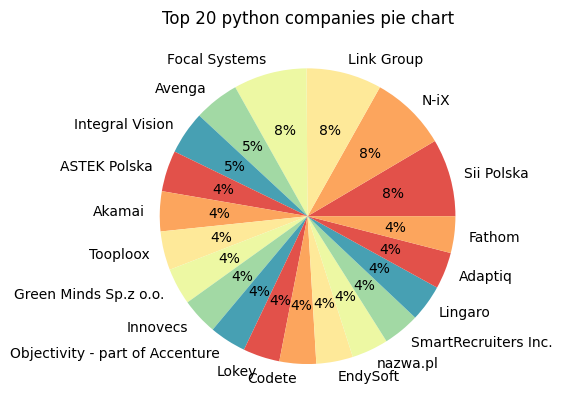

In [39]:
company_pie(df, term)